Problem statement (Term Deposit Sale)
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

from scipy import stats
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image 

from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
df = pd.read_csv("bank-full.csv")
df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

In [6]:
df.shape

(45211, 17)

In [7]:
df.size

768587

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

### 1. Univariate Analysis

In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [11]:
df.describe(include = 'all').T

count unique          top   freq     mean      std       min  \
age       45,211.00    NaN          NaN    NaN    40.94    10.62     18.00   
job           45211     12  blue-collar   9732      NaN      NaN       NaN   
marital       45211      3      married  27214      NaN      NaN       NaN   
education     45211      4    secondary  23202      NaN      NaN       NaN   
default       45211      2           no  44396      NaN      NaN       NaN   
balance   45,211.00    NaN          NaN    NaN 1,362.27 3,044.77 -8,019.00   
housing       45211      2          yes  25130      NaN      NaN       NaN   
loan          45211      2           no  37967      NaN      NaN       NaN   
contact       45211      3     cellular  29285      NaN      NaN       NaN   
day       45,211.00    NaN          NaN    NaN    15.81     8.32      1.00   
month         45211     12          may  13766      NaN      NaN       NaN   
duration  45,211.00    NaN          NaN    NaN   258.16   257.53      0.00   
campaign  45,211.00    NaN          NaN    NaN     2.76     3.10      1.00   
pdays     45,211.00    NaN          NaN    NaN    40.20   100.13     -1.00   
previous  45,211.00    NaN          NaN    NaN     0.58     2.30      0.00   
poutcome      45211      4      unknown  36959      NaN      NaN       NaN   
Target        45211      2           no  39922      NaN      NaN       NaN   

             25%    50%      75%        max  
age        33.00  39.00    48.00      95.00  
job          NaN    NaN      NaN        NaN  
marital      NaN    NaN      NaN        NaN  
education    NaN    NaN      NaN        NaN  
default      NaN    NaN      NaN        NaN  
balance    72.00 448.00 1,428.00 102,127.00  
housing      NaN    NaN      NaN        NaN  
loan         NaN    NaN      NaN        NaN  
contact      NaN    NaN      NaN        NaN  
day         8.00  16.00    21.00      31.00  
month        NaN    NaN      NaN        NaN  
duration  103.00 180.00   319.00   4,918.00  
campaign    1.00   2.00     3.00      63.00  
pdays      -1.00  -1.00    -1.00     871.00  
previous    0.00   0.00     0.00     275.00  
poutcome     NaN    NaN      NaN        NaN  
Target       NaN    NaN      NaN        NaN

In [12]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [13]:
#Range
'Age'
df['age'].max() - df['age'].min()

'Balance'
df['balance'].max() - df['balance'].min()

'Duration'
df['duration'].max() - df['duration'].min()

'Campaign'
df['campaign'].max() - df['campaign'].min()

'pdays'
df['pdays'].max() - df['pdays'].min()

'previous'
df['previous'].max() - df['previous'].min()

'Age'

77

'Balance'

110146

'Duration'

4918

'Campaign'

62

'pdays'

872

'previous'

275

In [14]:
#Value counts of all categorical columns.
for i in list(df.columns[df.dtypes=='object']):   # checking value counts of all object type columns
    print(df[i].value_counts(normalize = True))
    print()

blue-collar     0.22
management      0.21
technician      0.17
admin.          0.11
services        0.09
retired         0.05
self-employed   0.03
entrepreneur    0.03
unemployed      0.03
housemaid       0.03
student         0.02
unknown         0.01
Name: job, dtype: float64

married    0.60
single     0.28
divorced   0.12
Name: marital, dtype: float64

secondary   0.51
tertiary    0.29
primary     0.15
unknown     0.04
Name: education, dtype: float64

no    0.98
yes   0.02
Name: default, dtype: float64

yes   0.56
no    0.44
Name: housing, dtype: float64

no    0.84
yes   0.16
Name: loan, dtype: float64

cellular    0.65
unknown     0.29
telephone   0.06
Name: contact, dtype: float64

may   0.30
jul   0.15
aug   0.14
jun   0.12
nov   0.09
apr   0.06
feb   0.06
jan   0.03
oct   0.02
sep   0.01
mar   0.01
dec   0.00
Name: month, dtype: float64

unknown   0.82
failure   0.11
other     0.04
success   0.03
Name: poutcome, dtype: float64

no    0.88
yes   0.12
Name: Target, dtype: float64

In [15]:
#IQR
df.quantile(0.75) - df.quantile(0.25)

age           15.00
balance    1,356.00
day           13.00
duration     216.00
campaign       2.00
pdays          0.00
previous       0.00
dtype: float64

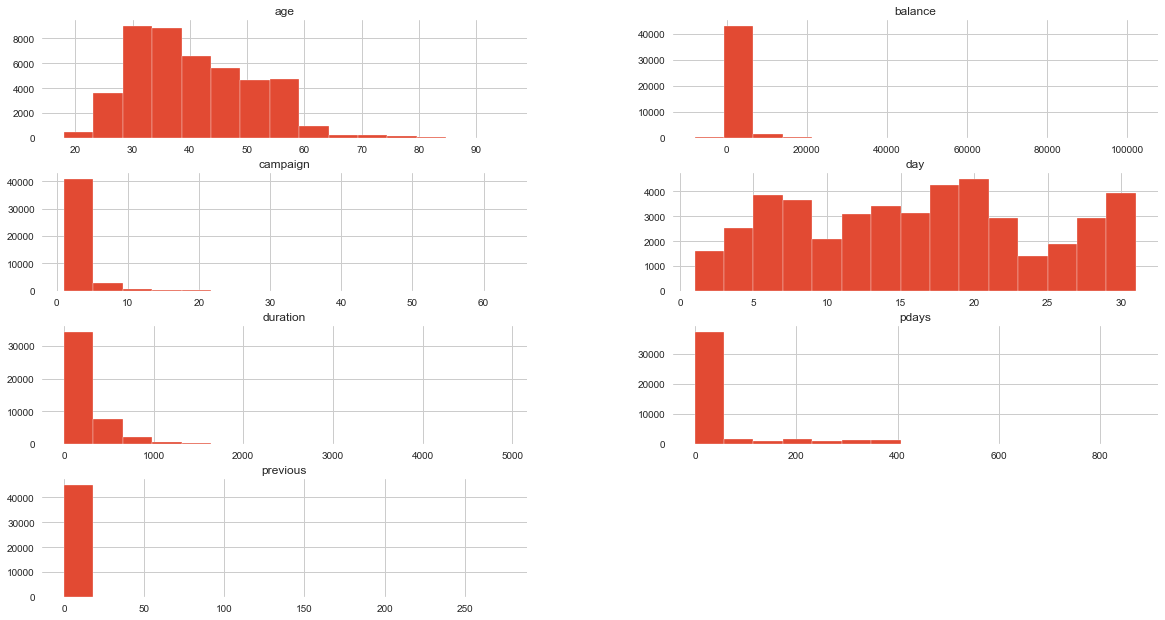

In [16]:
columns = list(df)
df[columns].hist(stacked=True, bins=15, figsize=(20,50), layout=(18,2)); 

In [17]:
df.skew() 

age         0.68
balance     8.36
day         0.09
duration    3.14
campaign    4.90
pdays       2.62
previous   41.85
dtype: float64

<Figure size 576x576 with 0 Axes>

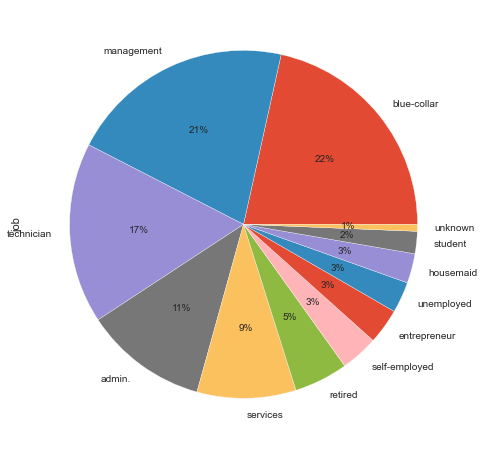

In [18]:
plt.figure(figsize=(8,8))
df['job'].value_counts().plot(kind='pie',autopct='%1.0f%%')

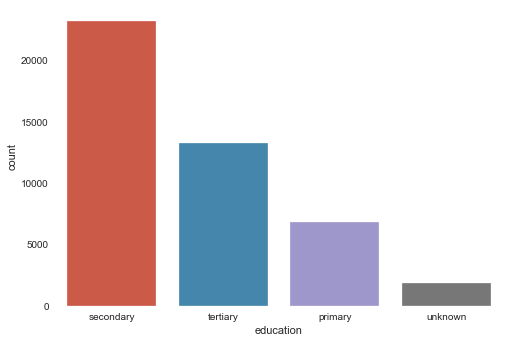

In [19]:
sns.countplot(df['education'], order = df['education'].value_counts().index)

In [20]:
sns.countplot(df['marital'])

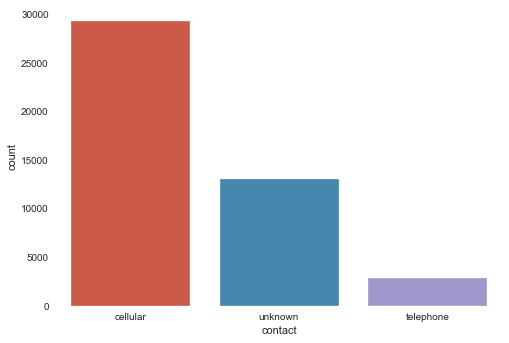

In [21]:
sns.countplot(df['contact'], order = df['contact'].value_counts().index)

In [22]:
sns.countplot(df['poutcome'], order = df['poutcome'].value_counts().index)

In [23]:
df.isnull().any().any()

False

<Figure size 1440x720 with 0 Axes>

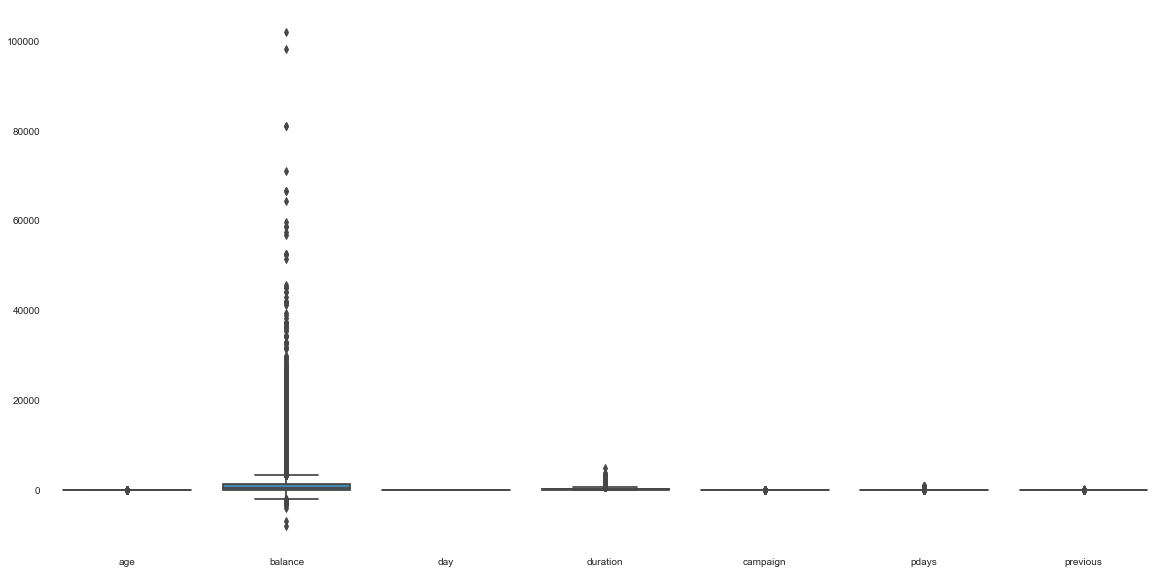

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

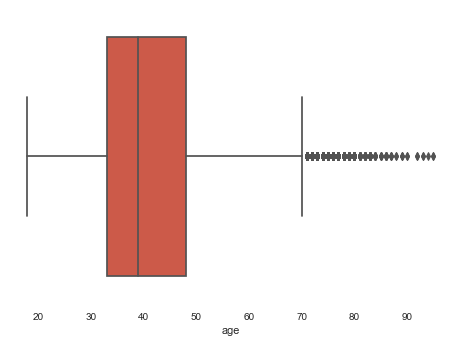

In [25]:
sns.boxplot(x=df['age'])

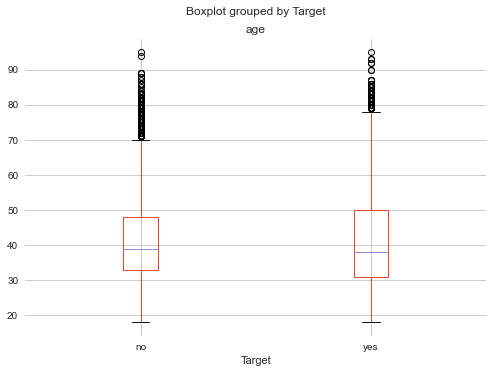

In [26]:
df.boxplot(column='age', by='Target')

In [27]:
#Removing outliers
df = df[df['age']<70]
df.head()
df.shape

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

(44657, 17)

In [28]:
#Removing duration = 0 sec
df = df[df['duration']>0]
df.shape

(44654, 17)

In [29]:
#Converting duration to minutes
def Minutes(s):
    return s/60

In [30]:
df['duration'] = df['duration'].apply(Minutes).round(2)

In [31]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may      4.35         1     -1         0  unknown     no  
1  unknown    5   may      2.52         1     -1         0  unknown     no  
2  unknown    5   may      1.27         1     -1         0  unknown     no  
3  unknown    5   may      1.53         1     -1         0  unknown     no  
4  unknown    5   may      3.30         1     -1         0  unknown     no

In [32]:
#Treating Outliers

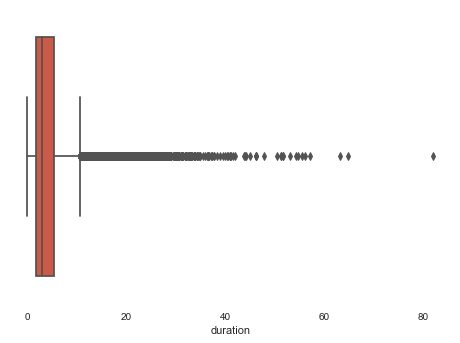

In [33]:
sns.boxplot(x=df['duration'])

In [34]:
Q1_dur = df['duration'].quantile(0.25)
Q3_dur = df['duration'].quantile(0.75)
IQR_dur = Q3_dur - Q1_dur
print(IQR_dur)

3.5600000000000005


In [35]:
np.where((df.duration < (Q1_dur - 1.5 * IQR_dur)) | (df.duration > (Q3_dur + 1.5 * IQR_dur)))

(array([   37,    43,    53, ..., 44645, 44646, 44651]),)

In [36]:
# Replace every outlier on the lower side by the lower whisker
for i in np.where(df.duration < Q1_dur - 1.5 * IQR_dur): 
    
    whisker  = Q1_dur - 1.5 * IQR_dur
    df.duration.iloc[i] = whisker
    
    
#Replace every outlier on the upper side by the upper whisker    
for i in np.where(df.duration > Q3_dur + 1.5 * IQR_dur):
    
    whisker  = Q3_dur + 1.5 * IQR_dur
    df.duration.iloc[i] = whisker

In [37]:
np.where((df.duration < (Q1_dur - 1.5 * IQR_dur)) | (df.duration > (Q3_dur + 1.5 * IQR_dur)))

(array([], dtype=int64),)

In [38]:
df.shape

(44654, 17)

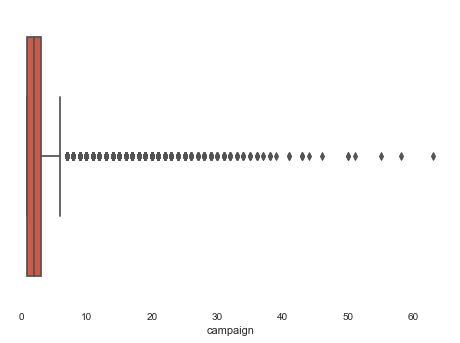

In [39]:
sns.boxplot(x=df['campaign'])

In [40]:
Q1_cam = df['campaign'].quantile(0.25)
Q3_cam = df['campaign'].quantile(0.75)
IQR_cam = Q3_cam - Q1_cam
print(IQR_cam)

2.0


In [41]:
np.where((df.campaign < (Q1_cam - 1.5 * IQR_cam)) | (df.campaign > (Q3_cam + 1.5 * IQR_cam)))

(array([  758,   780,   906, ..., 44249, 44354, 44514]),)

In [42]:
# Replace every outlier on the lower side by the lower whisker
for i in np.where(df.campaign < Q1_cam - 1.5 * IQR_cam): 
    
    whisker  = Q1_cam - 1.5 * IQR_cam
    df.campaign.iloc[i] = whisker
    
    
#Replace every outlier on the upper side by the upper whisker    
for i in np.where(df.campaign > Q3_cam + 1.5 * IQR_cam):
    
    whisker  = Q3_cam + 1.5 * IQR_cam
    df.campaign.iloc[i] = whisker

In [43]:
np.where((df.campaign < (Q1_cam - 1.5 * IQR_cam)) | (df.campaign > (Q3_cam + 1.5 * IQR_cam)))

(array([], dtype=int64),)

In [44]:
#Converting balance to log values
df["balance"] = df["balance"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['balance'].skew())

-0.8556221204985537


<Figure size 1440x576 with 0 Axes>

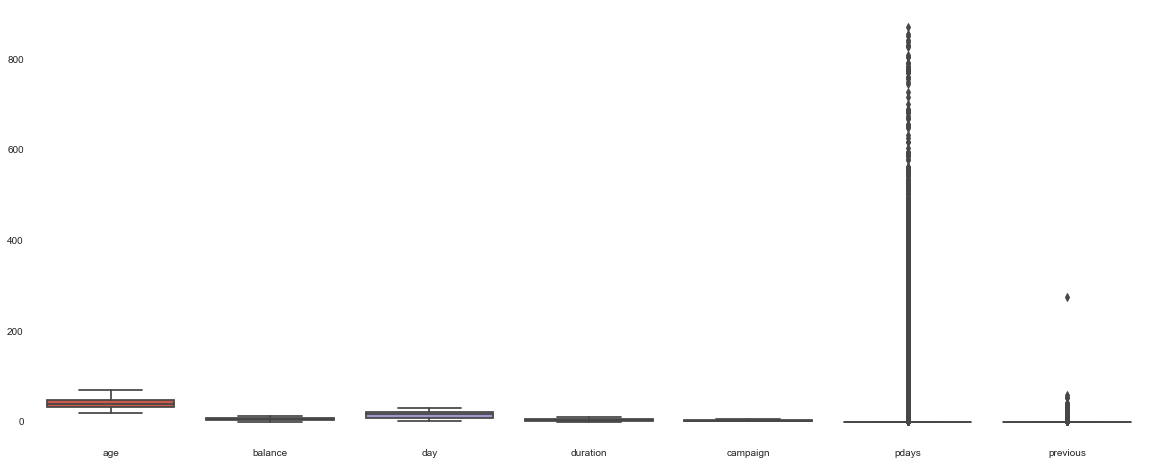

In [45]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df)

In [46]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     7.67     yes   no   
1   44    technician   single  secondary      no     3.37     yes   no   
2   33  entrepreneur  married  secondary      no     0.69     yes  yes   
3   47   blue-collar  married    unknown      no     7.32     yes   no   
4   33       unknown   single    unknown      no     0.00      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may      4.35      1.00     -1         0  unknown     no  
1  unknown    5   may      2.52      1.00     -1         0  unknown     no  
2  unknown    5   may      1.27      1.00     -1         0  unknown     no  
3  unknown    5   may      1.53      1.00     -1         0  unknown     no  
4  unknown    5   may      3.30      1.00     -1         0  unknown     no

In [47]:
df['duration'].mean()

3.89561696600507

In [48]:
df.mode()

age          job  marital  education default  balance housing loan  \
0   32  blue-collar  married  secondary      no     0.00     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome Target  
0  cellular   20   may     10.62      1.00     -1         0  unknown     no

In [49]:
#Imputing unknown job & education with most frequent values
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values = 'unknown', strategy="most_frequent")
cols=['job','education']
imputer = rep_0.fit(df[cols])
df[cols] = imputer.transform(df[cols])
df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     7.67     yes   no   
1   44    technician    single  secondary      no     3.37     yes   no   
2   33  entrepreneur   married  secondary      no     0.69     yes  yes   
3   47   blue-collar   married  secondary      no     7.32     yes   no   
4   33   blue-collar    single  secondary      no     0.00      no   no   
5   35    management   married   tertiary      no     5.44     yes   no   
6   28    management    single   tertiary      no     6.10     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes     0.69     yes   no   
8   58       retired   married    primary      no     4.80     yes   no   
9   43    technician    single  secondary      no     6.39     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may      4.35      1.00     -1         0  unknown     no  
1  unknown    5   may      2.52      1.00     -1         0  unknown     no  
2  unknown    5   may      1.27      1.00     -1         0  unknown     no  
3  unknown    5   may      1.53      1.00     -1         0  unknown     no  
4  unknown    5   may      3.30      1.00     -1         0  unknown     no  
5  unknown    5   may      2.32      1.00     -1         0  unknown     no  
6  unknown    5   may      3.62      1.00     -1         0  unknown     no  
7  unknown    5   may      6.33      1.00     -1         0  unknown     no  
8  unknown    5   may      0.83      1.00     -1         0  unknown     no  
9  unknown    5   may      0.92      1.00     -1         0  unknown     no

Summary:
From the Pandas profiling report & analysis done above we observe that:
There are total 17 variables (7 Numerical, 6 categorical & 4 Boolean) and 45211 records. There are no missing values in the data. However do we have some unknown values which we need to address. Please refer below observations from data.

1. age: Continuous feature
The mean age is 40 years & median is 39 years. It's close to normal distribution. However there are few outliers 
which have been removed.

2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
There are 11 distinct job categories. There is almost equal representation of blue collared & management profiles.
(~21%). Technicians represent 17%. The unknowns have been replaced by most frequent value.

3. marital: marital status (married, single, divorced)
60% of the people are married, 28.3% single & 11.5% divorced.

4. education: education level (primary, secondary, tertiary)
51.3% have completed secondary education, 29.4% have tertiary & 15.2% have completed primary. Unknowns were 4% which have been replaced by secondary education (i.e. most frequent value).

5. default: has credit in default? 
1.8% are defaulters. Since we do not want to provide term deposit loan to these people we shall remove them from our data set while modeling.

6. housing: has housing loan?
55.6% have housing loans while 44.4% do not.

7. loan: has personal loan?
16% have personal loans while 84% do not.

8. balance in account
The average balance is 1362. The skewness is 8.36. Log has been taken for balance, Hence the skewness is now reduced to -0.87.

9. contact: contact communication type
64.8% have been contacted by cellular , 6.4% by telephone, 28.8% are unknowns.

10. month: last contact month of year
In the whole year, 71.3% contacts were made during May to Aug period.

12. duration: last contact duration, in seconds*
The mean duration is 3.9 minutes. 3 records had 0 seconds call hence have been removed. The seconds column is converted to minutes for ease of understanding.

13. campaign: number of contacts performed during this campaign and for this client
Avergae of 2.76 calls were made.

15. previous: number of contacts performed before this campaign and for this client
81.7 % people have not been contacted since last campaign which makes it highly skewed. The skewness score is 41.0. 
Hence we shall drop this column.

16. poutcome: outcome of the previous marketing campaign
3.3% was the success rate for last campaign. For 81.7 % result is unknown. Hence we can remove this column as well.

17. Target: Tell us has the client subscribed a term deposit. (Yes, No)
11.7% is the success rate.

### 2. Multivariate Analysis

In [50]:
df.corr()

age  balance   day  duration  campaign  pdays  previous
age       1.00     0.06 -0.01     -0.03      0.04  -0.03     -0.01
balance   0.06     1.00 -0.02      0.04     -0.03   0.04      0.04
day      -0.01    -0.02  1.00     -0.04      0.15  -0.09     -0.05
duration -0.03     0.04 -0.04      1.00     -0.10   0.01      0.00
campaign  0.04    -0.03  0.15     -0.10      1.00  -0.09     -0.02
pdays    -0.03     0.04 -0.09      0.01     -0.09   1.00      0.45
previous -0.01     0.04 -0.05      0.00     -0.02   0.45      1.00

In [51]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

<Figure size 720x360 with 0 Axes>

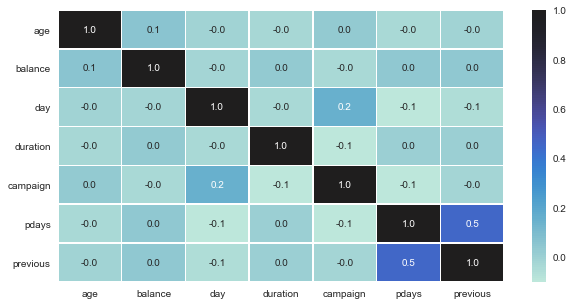

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

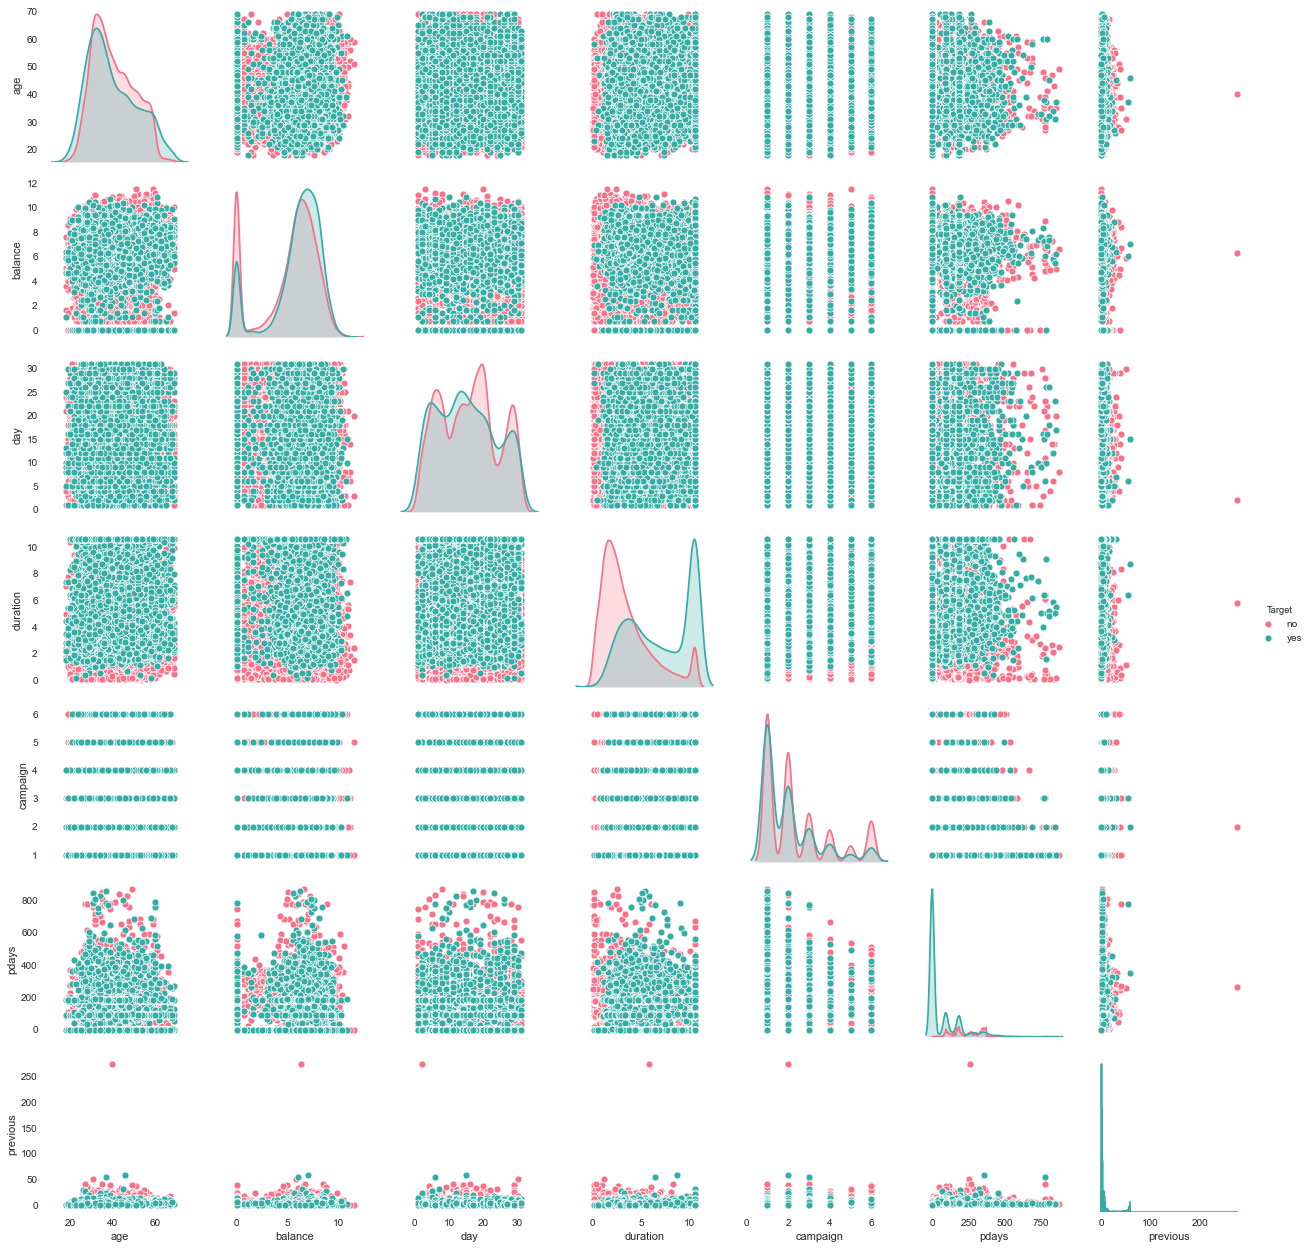

In [53]:
import seaborn as sns
sns.pairplot(df, hue="Target", palette="husl")
plt.show()

<Figure size 576x360 with 0 Axes>

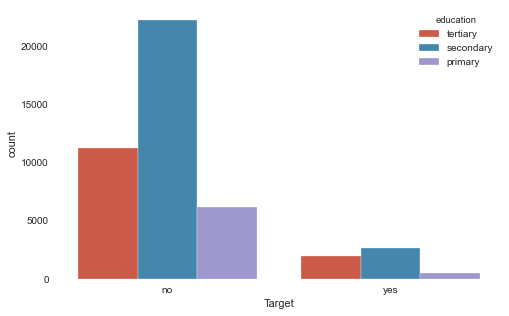

In [54]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['Target'],hue=df['education'])
plt.show()

<Figure size 720x720 with 0 Axes>

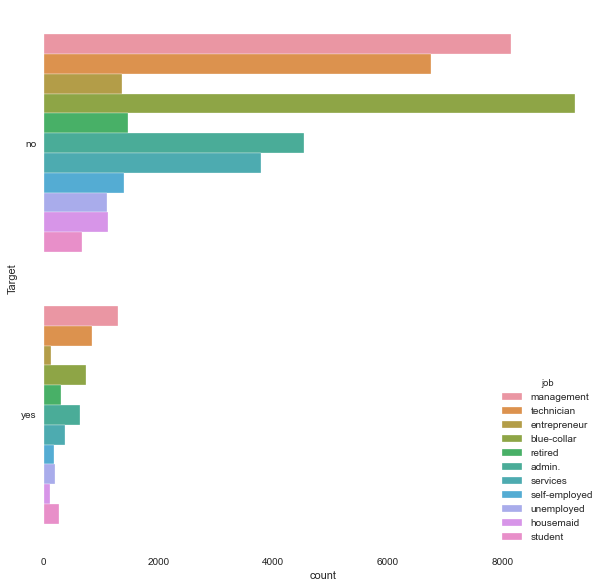

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(y=df['Target'], hue=df['job'])

<Figure size 576x360 with 0 Axes>

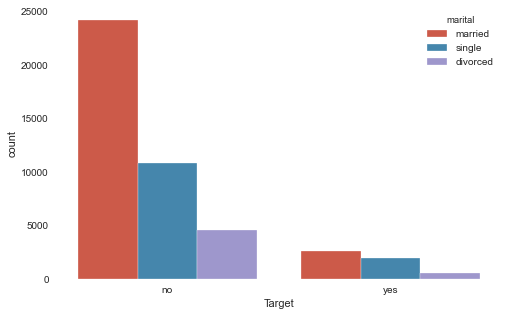

In [56]:
plt.figure(figsize=(8,5)) # set figure size.
ax=sns.countplot(x=df['Target'],hue=df['marital']) 
plt.show()

<Figure size 576x360 with 0 Axes>

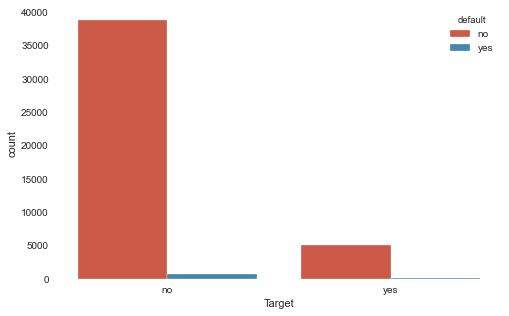

In [57]:
plt.figure(figsize=(8,5)) # set figure size.
ax=sns.countplot(x=df['Target'],hue=df['default']) 
plt.show()

<Figure size 576x360 with 0 Axes>

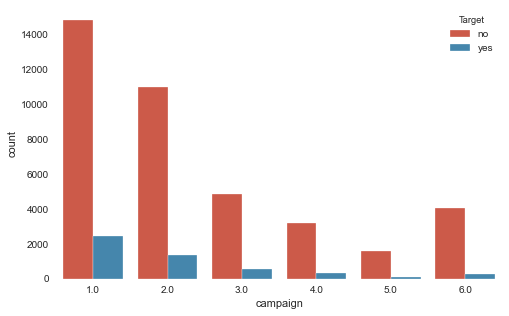

In [58]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['campaign'],hue=df['Target']) 
plt.show()

<Figure size 576x360 with 0 Axes>

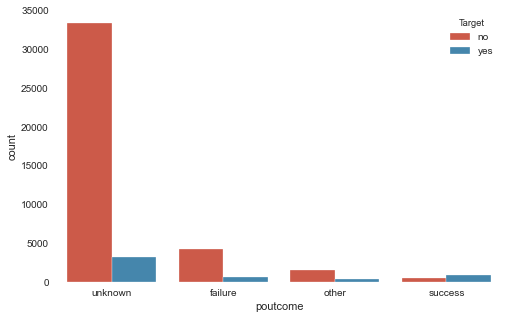

In [59]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['poutcome'],hue=df['Target']) 
plt.show()

<Figure size 1080x360 with 0 Axes>

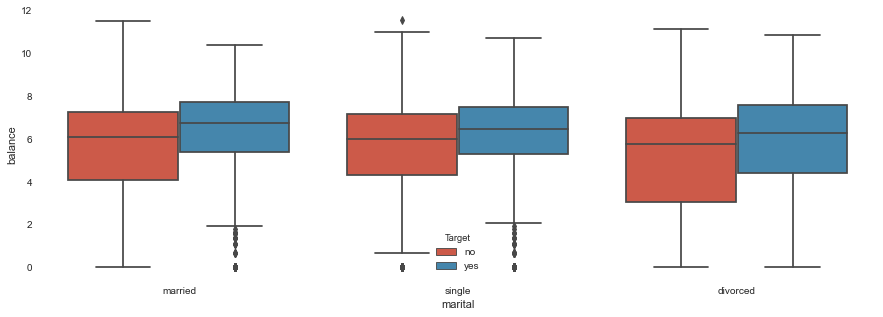

In [60]:
plt.figure(figsize=(15,5))
sns.boxplot(x="marital",y="balance",data=df,hue="Target")
plt.show()

In [61]:
df['age_bins'] = pd.cut(x=df['age'], bins=[10 , 19, 29, 39, 49, 59, 69, 79])
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     7.67     yes   no   
1   44    technician   single  secondary      no     3.37     yes   no   
2   33  entrepreneur  married  secondary      no     0.69     yes  yes   
3   47   blue-collar  married  secondary      no     7.32     yes   no   
4   33   blue-collar   single  secondary      no     0.00      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  \
0  unknown    5   may      4.35      1.00     -1         0  unknown     no   
1  unknown    5   may      2.52      1.00     -1         0  unknown     no   
2  unknown    5   may      1.27      1.00     -1         0  unknown     no   
3  unknown    5   may      1.53      1.00     -1         0  unknown     no   
4  unknown    5   may      3.30      1.00     -1         0  unknown     no   

   age_bins  
0  (49, 59]  
1  (39, 49]  
2  (29, 39]  
3  (39, 49]  
4  (29, 39]

In [62]:
#one-way Tables
my_tab = pd.crosstab(index=df["age_bins"],  # Make a crosstab
                     columns="count")                  # Name the count column
my_tab

col_0     count
age_bins       
(10, 19]     47
(19, 29]   5226
(29, 39]  18087
(39, 49]  11655
(49, 59]   8409
(59, 69]   1230

<Figure size 576x360 with 0 Axes>

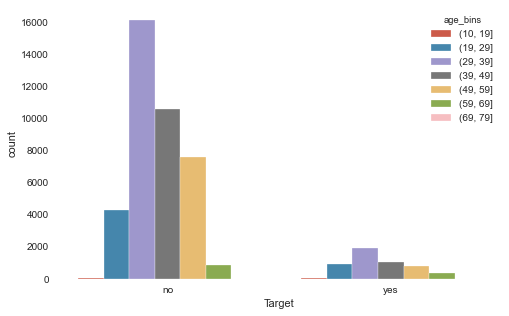

In [63]:
plt.figure(figsize=(8,5)) 
ax=sns.countplot(x=df['Target'],hue=df['age_bins']) 
plt.show()

None of the variables are majorly correlated. However there is some correlation between pdays & previous. 
Previous is highly skewed with score of 41. Hence we shall remove it. 
Also 81.7% people haven't been contacted since last campaign which makes it skewed hence we shall drop pdays as well.

People who have signed up for term deposit generally had higher average balance in their account, were aged 29-49 yrs, majorly had tertiary or secondary education, were in management, technician or blue collared jobs, were single or married, were not defaulters and had majorly been contacted once or twice during this campaign (means they immediately signed up).

In [64]:
columns_to_drop = ['day', 'pdays','previous', 'age_bins']
df = df.drop(columns_to_drop, axis = 1) 

In [65]:
df = df[df['default'] == 'no']
df.head()
df.shape

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     7.67     yes   no   
1   44    technician   single  secondary      no     3.37     yes   no   
2   33  entrepreneur  married  secondary      no     0.69     yes  yes   
3   47   blue-collar  married  secondary      no     7.32     yes   no   
4   33   blue-collar   single  secondary      no     0.00      no   no   

   contact month  duration  campaign poutcome Target  
0  unknown   may      4.35      1.00  unknown     no  
1  unknown   may      2.52      1.00  unknown     no  
2  unknown   may      1.27      1.00  unknown     no  
3  unknown   may      1.53      1.00  unknown     no  
4  unknown   may      3.30      1.00  unknown     no

(43840, 14)

Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [66]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

age           job   marital  education default  balance housing loan  \
0    58    management   married   tertiary      no     7.67     yes   no   
1    44    technician    single  secondary      no     3.37     yes   no   
2    33  entrepreneur   married  secondary      no     0.69     yes  yes   
3    47   blue-collar   married  secondary      no     7.32     yes   no   
4    33   blue-collar    single  secondary      no     0.00      no   no   
5    35    management   married   tertiary      no     5.44     yes   no   
6    28    management    single   tertiary      no     6.10     yes  yes   
8    58       retired   married    primary      no     4.80     yes   no   
9    43    technician    single  secondary      no     6.39     yes   no   
10   41        admin.  divorced  secondary      no     5.60     yes   no   

    contact month  duration  campaign poutcome Target  
0   unknown   may      4.35      1.00  unknown     no  
1   unknown   may      2.52      1.00  unknown     no  
2   unknown   may      1.27      1.00  unknown     no  
3   unknown   may      1.53      1.00  unknown     no  
4   unknown   may      3.30      1.00  unknown     no  
5   unknown   may      2.32      1.00  unknown     no  
6   unknown   may      3.62      1.00  unknown     no  
8   unknown   may      0.83      1.00  unknown     no  
9   unknown   may      0.92      1.00  unknown     no  
10  unknown   may      3.70      1.00  unknown     no

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43840 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        43840 non-null  int64   
 1   job        43840 non-null  category
 2   marital    43840 non-null  category
 3   education  43840 non-null  category
 4   default    43840 non-null  category
 5   balance    43840 non-null  float64 
 6   housing    43840 non-null  category
 7   loan       43840 non-null  category
 8   contact    43840 non-null  category
 9   month      43840 non-null  category
 10  duration   43840 non-null  float64 
 11  campaign   43840 non-null  float64 
 12  poutcome   43840 non-null  category
 13  Target     43840 non-null  category
dtypes: category(10), float64(3), int64(1)
memory usage: 2.1 MB


In [68]:
replaceStruct = {
                "marital": {'married':1, 'single':2, 'divorced':3},
                 "education": {"primary": 1, "secondary":2 , "tertiary": 3},
                "month": {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12},
                "default":{"no": 0, "yes": 1 }, 
                "housing":{"no": 0, "yes": 1 }, 
                 "loan":{"no": 0, "yes": 1 },
                "Target": {"no": 0, "yes": 1 },
                    }
oneHotCols=["job","contact", "poutcome"]

In [69]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)
df.shape

age  marital  education  default  balance  housing  loan  month  duration  \
0    58        1          3        0     7.67        1     0      5      4.35   
1    44        2          2        0     3.37        1     0      5      2.52   
2    33        1          2        0     0.69        1     1      5      1.27   
3    47        1          2        0     7.32        1     0      5      1.53   
4    33        2          2        0     0.00        0     0      5      3.30   
5    35        1          3        0     5.44        1     0      5      2.32   
6    28        2          3        0     6.10        1     1      5      3.62   
8    58        1          1        0     4.80        1     0      5      0.83   
9    43        2          2        0     6.39        1     0      5      0.92   
10   41        3          2        0     5.60        1     0      5      3.70   

    campaign  ...  job_student  job_technician  job_unemployed  \
0       1.00  ...            0               0               0   
1       1.00  ...            0               1               0   
2       1.00  ...            0               0               0   
3       1.00  ...            0               0               0   
4       1.00  ...            0               0               0   
5       1.00  ...            0               0               0   
6       1.00  ...            0               0               0   
8       1.00  ...            0               0               0   
9       1.00  ...            0               1               0   
10      1.00  ...            0               0               0   

    contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                  0                  0                1                 0   
1                  0                  0                1                 0   
2                  0                  0                1                 0   
3                  0                  0                1                 0   
4                  0                  0                1                 0   
5                  0                  0                1                 0   
6                  0                  0                1                 0   
8                  0                  0                1                 0   
9                  0                  0                1                 0   
10                 0                  0                1                 0   

    poutcome_other  poutcome_success  poutcome_unknown  
0                0                 0                 1  
1                0                 0                 1  
2                0                 0                 1  
3                0                 0                 1  
4                0                 0                 1  
5                0                 0                 1  
6                0                 0                 1  
8                0                 0                 1  
9                0                 0                 1  
10               0                 0                 1  

[10 rows x 29 columns]

(43840, 29)

In [70]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler()

In [71]:
df['duration'] = std_scale.fit_transform(df[['duration']])
df['balance'] = std_scale.fit_transform(df[['balance']])

In [72]:
df.head()

age  marital  education  default  balance  housing  loan  month  duration  \
0   58        1          3        0     0.84        1     0      5      0.15   
1   44        2          2        0    -0.72        1     0      5     -0.47   
2   33        1          2        0    -1.69        1     1      5     -0.90   
3   47        1          2        0     0.71        1     0      5     -0.81   
4   33        2          2        0    -1.95        0     0      5     -0.20   

   campaign  ...  job_student  job_technician  job_unemployed  \
0      1.00  ...            0               0               0   
1      1.00  ...            0               1               0   
2      1.00  ...            0               0               0   
3      1.00  ...            0               0               0   
4      1.00  ...            0               0               0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 29 columns]

In [73]:
#Data Split
from sklearn.model_selection import train_test_split

X = df.drop('Target',axis=1)     
Y = df['Target']   

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

#Checking split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))
print("")

#Checking Target True/False ratio in split data
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 1]), (len(df.loc[df['Target'] == 1])/len(df.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 0]), (len(df.loc[df['Target'] == 0])/len(df.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

age  marital  education  default  balance  housing  loan  month  \
39921   57        1          1        0     0.97        0     0      6   
14085   51        2          3        0    -1.95        1     0      7   
35351   42        2          2        0     0.87        1     0      5   
37268   45        1          2        0    -0.04        1     0      5   
1669    33        1          1        0    -0.21        1     0      5   

       duration  campaign  ...  job_student  job_technician  job_unemployed  \
39921      1.41      2.00  ...            0               0               0   
14085     -0.54      2.00  ...            0               0               0   
35351      1.22      2.00  ...            0               0               0   
37268     -0.45      5.00  ...            0               0               0   
1669       0.09      1.00  ...            0               0               0   

       contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
39921                 1                  0                0                 0   
14085                 1                  0                0                 0   
35351                 1                  0                0                 0   
37268                 1                  0                0                 0   
1669                  0                  0                1                 0   

       poutcome_other  poutcome_success  poutcome_unknown  
39921               0                 0                 1  
14085               0                 0                 1  
35351               0                 0                 1  
37268               1                 0                 0  
1669                0                 0                 1  

[5 rows x 28 columns]

70.00% data is in training set
30.00% data is in test set

Original Target True Values    : 5003 (11.41%)
Original Target False Values   : 38837 (88.59%)

Training Target True Values    : 3478 (11.33%)
Training Target False Values   : 27210 (88.67%)

Test Target True Values        : 1525 (11.60%)
Test Target False Values       : 11627 (88.40%)



Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)

2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

### Logistic Regression

In [74]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [75]:
y_predict = logreg.predict(x_test)
y_predict_train = logreg.predict(x_train)

In [76]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

LogisticRegression(solver='liblinear')

0    1    2    3    4     5     6     7    8     9  ...    19    20  \
0 -0.01 0.10 0.23 0.00 0.19 -0.76 -0.52 -0.02 1.22 -0.13  ... -0.14 -0.19   

    21    22    23    24    25   26    27  intercept  
0 0.03 -0.03 -1.02 -0.85 -0.57 1.59 -1.19      -1.02  

[1 rows x 29 columns]

In [77]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

<Figure size 576x396 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

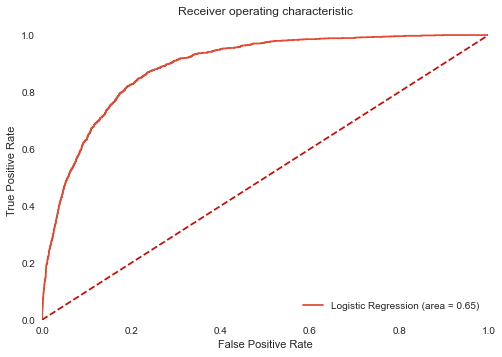

In [78]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [79]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [80]:
#Changing the value of Solver 
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1.0,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(random_state=42, solver='newton-cg')

LogisticRegression(random_state=42)

LogisticRegression(random_state=42, solver='liblinear')

LogisticRegression(random_state=42, solver='sag')

LogisticRegression(random_state=42, solver='saga')

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.899, 0.899, 0.899, 0.899, 0.899]

[0.897, 0.897, 0.897, 0.897, 0.897]


In [81]:
#Changing Penalty to l1
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 1.0,solver=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(penalty='l1', random_state=42, solver='saga')

['liblinear', 'saga']

[0.899, 0.899]

[0.897, 0.897]


In [82]:
# changing class weight to balanced.
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') 

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

Trainig accuracy 0.8210701251303442

Testing accuracy 0.8152372262773723


In [83]:
# Running a loop to check different values of 'C'. 

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight=None, C=i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.25, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.5, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=0.75, penalty='l1', random_state=42, solver='liblinear')

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.897, 0.899, 0.9, 0.899, 0.899, 0.899]

[0.895, 0.898, 0.897, 0.897, 0.897, 0.897]


LogisticRegression(C=0.1, random_state=42, solver='liblinear')

Trainig accuracy 0.8994069343065694
Testing accuracy 0.8968217761557178


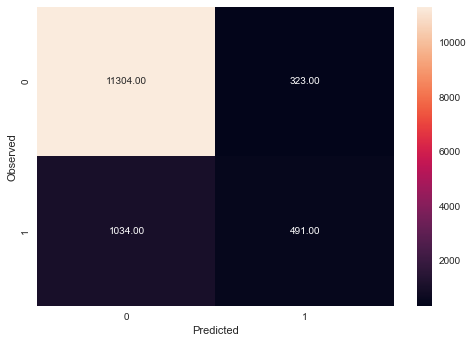

Confusion Matrix None
Recall 0.3219672131147541
Precision 0.6031941031941032
F1 Score 0.4198375374091492
ROC AUC Test 0.6470935231308698
ROC AUC Train 0.6500472228544667


In [84]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', class_weight=None,solver='liblinear',C=0.1) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_prob = model.predict_proba(x_test)

TrainAcc = model.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = model.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_predict)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_predict)
print("Recall",Recall)

Precision = precision_score(y_test,y_predict)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_predict)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_predict)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_predict_train)
print("ROC AUC Train",AucTrain)

In [85]:
import pylab as pl
from sklearn.metrics import roc_curve, auc

In [86]:
fpr, tpr, thresholds =roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)

fpr  tpr  1-fpr    tf  thresholds
1 0.03 0.32   0.97 -0.65           1

Text(0.5, 0, '1-False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

[]

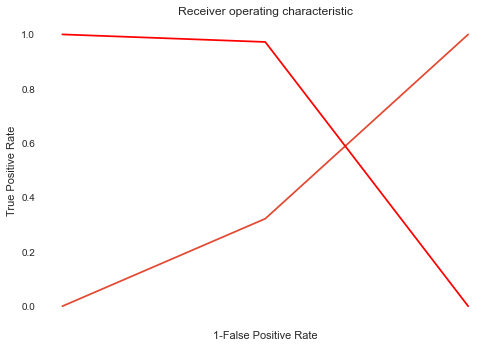

In [87]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

In [88]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [89]:
import scikitplot as skplt

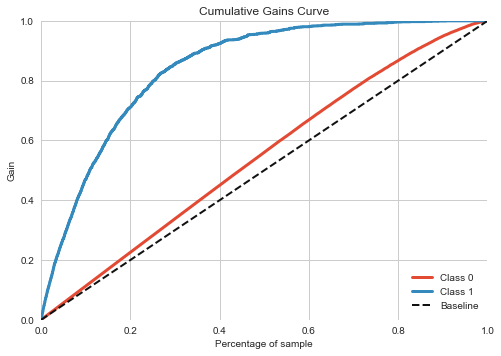

In [90]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_prob)

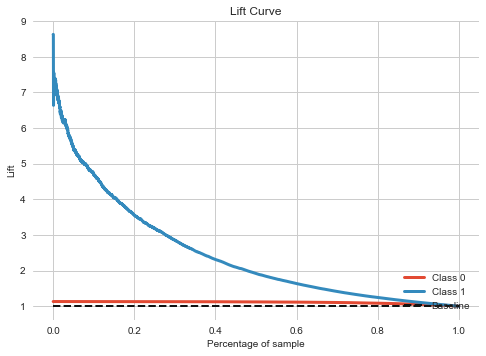

In [91]:
skplt.metrics.plot_lift_curve(y_test, y_prob)

In [92]:
pd.DataFrame({"Feature":x_train.columns.tolist(),"Coefficients":model.coef_[0]})

Feature  Coefficients
0                 age         -0.01
1             marital          0.08
2           education          0.19
3             default          0.00
4             balance          0.19
5             housing         -0.77
6                loan         -0.51
7               month         -0.02
8            duration          1.21
9            campaign         -0.13
10         job_admin.          0.07
11    job_blue-collar         -0.28
12   job_entrepreneur         -0.35
13      job_housemaid         -0.32
14     job_management         -0.09
15        job_retired          0.20
16  job_self-employed         -0.22
17       job_services         -0.17
18        job_student          0.58
19     job_technician         -0.13
20     job_unemployed         -0.17
21   contact_cellular          0.07
22  contact_telephone          0.01
23    contact_unknown         -0.95
24   poutcome_failure         -0.79
25     poutcome_other         -0.50
26   poutcome_success          1.55
27   poutcome_unknown         -1.14

Trainig accuracy 0.8994069343065694
Testing accuracy 0.8968217761557178


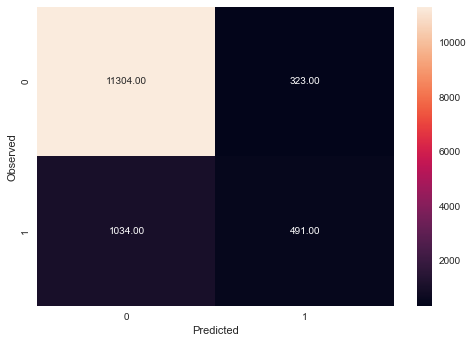

Confusion Matrix None
Recall 0.3219672131147541
Precision 0.6031941031941032
F1 Score 0.4198375374091492
ROC AUC Test 0.6470935231308698
ROC AUC Train 0.6500472228544667


In [93]:
TrainAcc = model.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = model.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_predict)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_predict)
print("Recall",Recall)

Precision = precision_score(y_test,y_predict)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_predict)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_predict)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_predict_train)
print("ROC AUC Train",AucTrain)

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa01bc56d50>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fa01fca7550>,
                     model=None)

0.8968217761557178

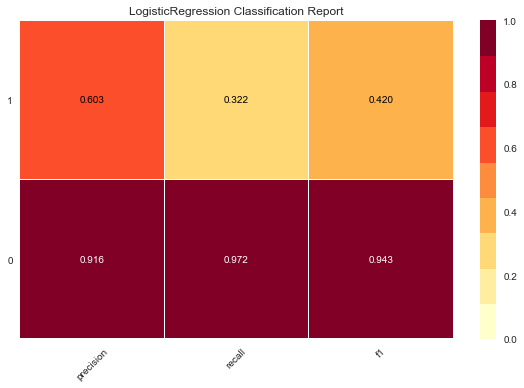

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa01bc4bf10>,
       model=None)

0.8893664551162509

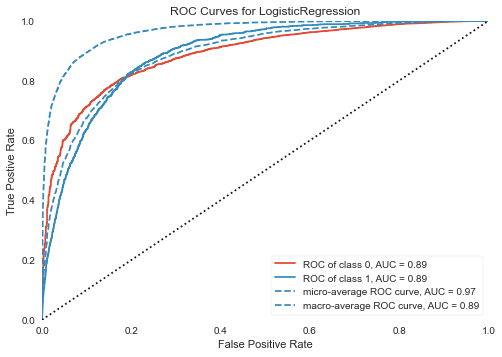

In [94]:
# Additional
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [95]:
result = pd.DataFrame({'Model' : ['Logistic Regression'], 'TrainAcc' : [TrainAcc], 'TestAcc' : [TestAcc],
                      'Recall' : [Recall], 'Precision' : [Precision],'F1_Score' :  [F1_Score], 
                      'AucTest' : [AucTest],'AucTrain' : [AucTrain],})
result

Model  TrainAcc  TestAcc  Recall  Precision  F1_Score  \
0  Logistic Regression      0.90     0.90    0.32       0.60      0.42   

   AucTest  AucTrain  
0     0.65      0.65

### Decision Tree

In [96]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [97]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.868080900243309


In [98]:
y_pred_Tree = dTree.predict(x_test)
y_pred_Tree_train = dTree.predict(x_train)

In [99]:
train_char_label = ['No', 'Yes']
df_Tree_File = open('df_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=df_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
df_Tree_File.close()

In [100]:
from os import system

In [101]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng df_tree.dot -o df_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("df_tree.png")) 

system command returning error: 32512


Trainig accuracy 1.0
Testing accuracy 0.868080900243309


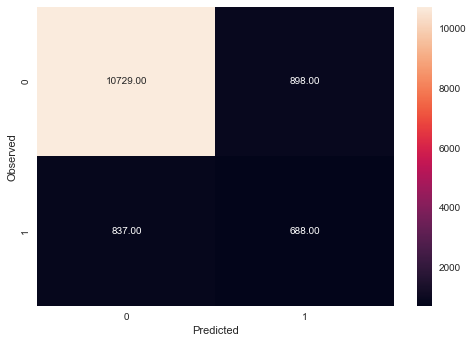

Confusion Matrix None
Recall 0.45114754098360654
Precision 0.4337957124842371
F1 Score 0.44230151076824176
ROC AUC Test 0.6869567583648574
ROC AUC Train 1.0


In [102]:
TrainAcc = dTree.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = dTree.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_pred_Tree)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_pred_Tree)
print("Recall",Recall)

Precision = precision_score(y_test,y_pred_Tree)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_pred_Tree)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_pred_Tree)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_pred_Tree_train)
print("ROC AUC Train",AucTrain)

In [103]:
result.loc[1] = ['Decision Tree', TrainAcc, TestAcc, Recall, Precision,F1_Score, AucTest, AucTrain]
result

Model  TrainAcc  TestAcc  Recall  Precision  F1_Score  \
0  Logistic Regression      0.90     0.90    0.32       0.60      0.42   
1        Decision Tree      1.00     0.87    0.45       0.43      0.44   

   AucTest  AucTrain  
0     0.65      0.65  
1     0.69      1.00

### Reducing over fitting (Regularization)

In [104]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

DecisionTreeClassifier(max_depth=3, random_state=1)

0.9038712200208551
0.8981143552311436


In [105]:
train_char_label = ['No', 'Yes']
df_Tree_FileR = open('df_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=df_Tree_FileR, feature_names = list(x_train), class_names = list(train_char_label))
df_Tree_FileR.close()

In [106]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng df_treeR.dot -o df_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("df_treeR.png")) 

system command returning error: 32512


In [107]:
features = [col for col in df.columns if col != 'Target']

df['ProbTarget_0'] = dTreeR.predict_proba(df[features])[:,0]
df['ProbTarget_1'] = dTreeR.predict_proba(df[features])[:,1]
df.head()

age  marital  education  default  balance  housing  loan  month  duration  \
0   58        1          3        0     0.84        1     0      5      0.15   
1   44        2          2        0    -0.72        1     0      5     -0.47   
2   33        1          2        0    -1.69        1     1      5     -0.90   
3   47        1          2        0     0.71        1     0      5     -0.81   
4   33        2          2        0    -1.95        0     0      5     -0.20   

   campaign  ...  job_unemployed  contact_cellular  contact_telephone  \
0      1.00  ...               0                 0                  0   
1      1.00  ...               0                 0                  0   
2      1.00  ...               0                 0                  0   
3      1.00  ...               0                 0                  0   
4      1.00  ...               0                 0                  0   

   contact_unknown  poutcome_failure  poutcome_other  poutcome_success  \
0                1                 0               0                 0   
1                1                 0               0                 0   
2                1                 0               0                 0   
3                1                 0               0                 0   
4                1                 0               0                 0   

   poutcome_unknown  ProbTarget_0  ProbTarget_1  
0                 1          0.88          0.12  
1                 1          0.97          0.03  
2                 1          0.97          0.03  
3                 1          0.97          0.03  
4                 1          0.97          0.03  

[5 rows x 31 columns]

In [108]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                   Imp
age               0.00
marital           0.00
education         0.00
default           0.00
balance           0.00
housing           0.00
loan              0.00
month             0.00
duration          0.63
campaign          0.00
job_admin.        0.00
job_blue-collar   0.00
job_entrepreneur  0.00
job_housemaid     0.00
job_management    0.00
job_retired       0.00
job_self-employed 0.00
job_services      0.00
job_student       0.00
job_technician    0.00
job_unemployed    0.00
contact_cellular  0.02
contact_telephone 0.00
contact_unknown   0.00
poutcome_failure  0.00
poutcome_other    0.00
poutcome_success  0.35
poutcome_unknown  0.00


In [109]:
print(dTreeR.score(x_test , y_test))
y_pred_Reg = dTreeR.predict(x_test)
y_pred_Reg_train = dTreeR.predict(x_train)

cm=metrics.confusion_matrix(y_test, y_pred_Reg, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8981143552311436


<Figure size 504x360 with 0 Axes>

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa039ca0d50>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fa025007c50>,
                     model=None)

0.8979622871046229

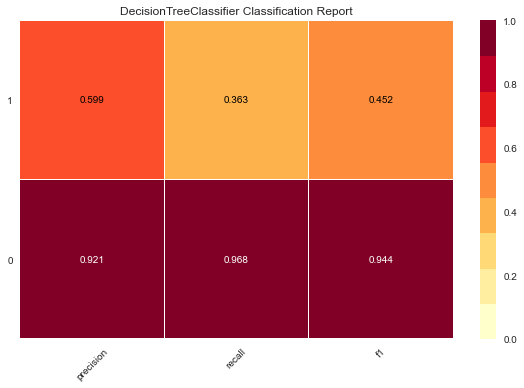

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa01d1ae250>,
       model=None)

0.8343813368262397

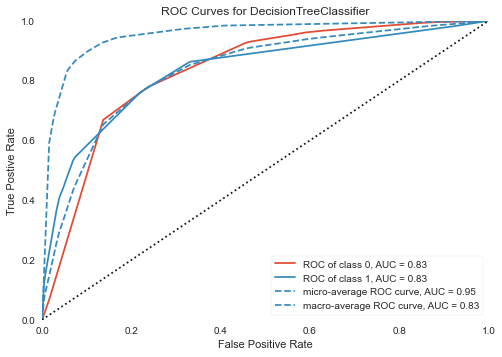

In [110]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "gini", max_depth=4))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "gini", max_depth=4))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

Trainig accuracy 0.9038712200208551
Testing accuracy 0.8981143552311436


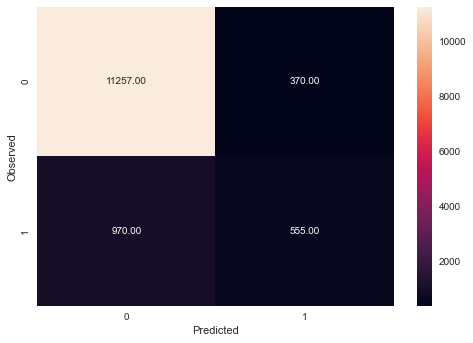

Confusion Matrix None
Recall 0.3639344262295082
Precision 0.6
F1 Score 0.45306122448979597
ROC AUC Test 0.6660559720379501
ROC AUC Train 0.6788469296902523


In [111]:
TrainAcc = dTreeR.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = dTreeR.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_pred_Reg)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_pred_Reg)
print("Recall",Recall)

Precision = precision_score(y_test,y_pred_Reg)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_pred_Reg)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_pred_Reg)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_pred_Reg_train)
print("ROC AUC Train",AucTrain)

In [112]:
result.loc[2] = ['Decision Tree Reg', TrainAcc, TestAcc, Recall, Precision,F1_Score, AucTest, AucTrain]
result

Model  TrainAcc  TestAcc  Recall  Precision  F1_Score  \
0  Logistic Regression      0.90     0.90    0.32       0.60      0.42   
1        Decision Tree      1.00     0.87    0.45       0.43      0.44   
2    Decision Tree Reg      0.90     0.90    0.36       0.60      0.45   

   AucTest  AucTrain  
0     0.65      0.65  
1     0.69      1.00  
2     0.67      0.68

## Ensemble Techniques

### Ensemble Learning Bagging

In [113]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.8956052311435523


<Figure size 504x360 with 0 Axes>

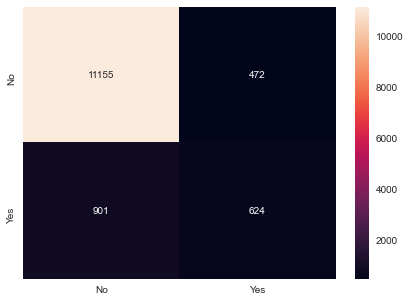

In [114]:
y_pred_bag = bgcl.predict(x_test)
y_pred_bag_train = bgcl.predict(x_train)

print(bgcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_pred_bag,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Trainig accuracy 0.999771897810219
Testing accuracy 0.8956052311435523


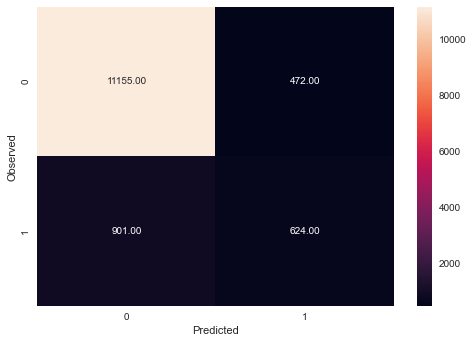

Confusion Matrix None
Recall 0.40918032786885244
Precision 0.5693430656934306
F1 Score 0.4761541396413583
ROC AUC Test 0.6842925807229356
ROC AUC Train 0.9991190597104412


In [115]:
TrainAcc = bgcl.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = bgcl.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_pred_bag)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_pred_bag)
print("Recall",Recall)

Precision = precision_score(y_test,y_pred_bag)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_pred_bag)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_pred_bag)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_pred_bag_train)
print("ROC AUC Train",AucTrain)

In [116]:
result.loc[3] = ['Ensemble Bag', TrainAcc, TestAcc, Recall, Precision,F1_Score, AucTest, AucTrain]
result

Model  TrainAcc  TestAcc  Recall  Precision  F1_Score  \
0  Logistic Regression      0.90     0.90    0.32       0.60      0.42   
1        Decision Tree      1.00     0.87    0.45       0.43      0.44   
2    Decision Tree Reg      0.90     0.90    0.36       0.60      0.45   
3         Ensemble Bag      1.00     0.90    0.41       0.57      0.48   

   AucTest  AucTrain  
0     0.65      0.65  
1     0.69      1.00  
2     0.67      0.68  
3     0.68      1.00

### Ensemble Learning - AdaBoosting

In [117]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8937043795620438


<Figure size 504x360 with 0 Axes>

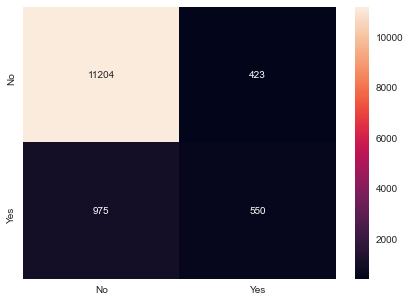

In [118]:
y_pred_ada = abcl.predict(x_test)
y_pred_ada_train = abcl.predict(x_train)

print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_pred_ada,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Trainig accuracy 0.8965719499478624
Testing accuracy 0.8937043795620438


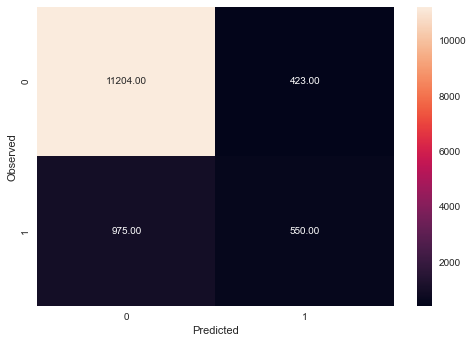

Confusion Matrix None
Recall 0.36065573770491804
Precision 0.5652620760534429
F1 Score 0.4403522818254604
ROC AUC Test 0.6621374499997884
ROC AUC Train 0.6668315292702446


In [119]:
TrainAcc = abcl.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = abcl.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_pred_ada)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_pred_ada)
print("Recall",Recall)

Precision = precision_score(y_test,y_pred_ada)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_pred_ada)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_pred_ada)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_pred_ada_train)
print("ROC AUC Train",AucTrain)

In [120]:
result.loc[4] = ['Ensemble Ada', TrainAcc, TestAcc, Recall, Precision,F1_Score, AucTest, AucTrain]
result

Model  TrainAcc  TestAcc  Recall  Precision  F1_Score  \
0  Logistic Regression      0.90     0.90    0.32       0.60      0.42   
1        Decision Tree      1.00     0.87    0.45       0.43      0.44   
2    Decision Tree Reg      0.90     0.90    0.36       0.60      0.45   
3         Ensemble Bag      1.00     0.90    0.41       0.57      0.48   
4         Ensemble Ada      0.90     0.89    0.36       0.57      0.44   

   AucTest  AucTrain  
0     0.65      0.65  
1     0.69      1.00  
2     0.67      0.68  
3     0.68      1.00  
4     0.66      0.67

### Ensemble Learning - GradientBoost

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.9009276155717761


<Figure size 504x360 with 0 Axes>

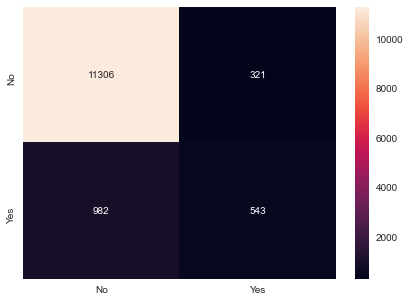

In [122]:
y_pred_grad = gbcl.predict(x_test)
y_pred_grad_train = gbcl.predict(x_train)

print(gbcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred_grad,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Trainig accuracy 0.9070972367049009
Testing accuracy 0.9009276155717761


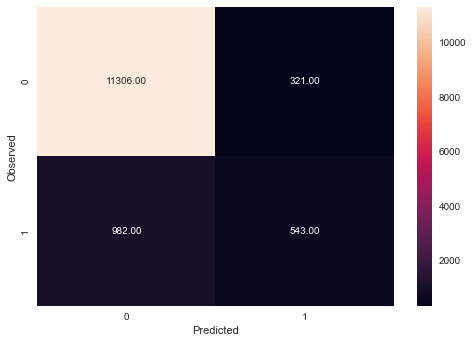

Confusion Matrix None
Recall 0.3560655737704918
Precision 0.6284722222222222
F1 Score 0.4545835077438259
ROC AUC Test 0.6642287101672619
ROC AUC Train 0.6760268619742218


In [123]:
TrainAcc = gbcl.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = gbcl.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_pred_grad)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_pred_grad)
print("Recall",Recall)

Precision = precision_score(y_test,y_pred_grad)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_pred_grad)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_pred_grad)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_pred_grad_train)
print("ROC AUC Train",AucTrain)

In [124]:
result.loc[5] = ['Ensemble Grad', TrainAcc, TestAcc, Recall, Precision,F1_Score, AucTest, AucTrain]
result

Model  TrainAcc  TestAcc  Recall  Precision  F1_Score  \
0  Logistic Regression      0.90     0.90    0.32       0.60      0.42   
1        Decision Tree      1.00     0.87    0.45       0.43      0.44   
2    Decision Tree Reg      0.90     0.90    0.36       0.60      0.45   
3         Ensemble Bag      1.00     0.90    0.41       0.57      0.48   
4         Ensemble Ada      0.90     0.89    0.36       0.57      0.44   
5        Ensemble Grad      0.91     0.90    0.36       0.63      0.45   

   AucTest  AucTrain  
0     0.65      0.65  
1     0.69      1.00  
2     0.67      0.68  
3     0.68      1.00  
4     0.66      0.67  
5     0.66      0.68

### Ensemble RandomForest Classifier

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=5)
rfcl = rfcl.fit(x_train, y_train)

0.8979622871046229


<Figure size 504x360 with 0 Axes>

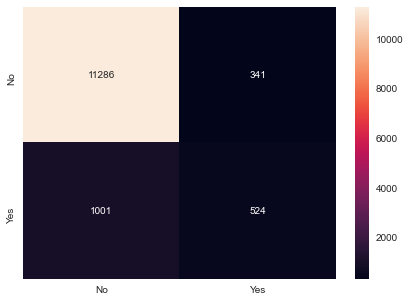

In [126]:
y_pred_ranfor = rfcl.predict(x_test)
y_pred_ranfor_train = rfcl.predict(x_train)

print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred_ranfor,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Trainig accuracy 0.9998044838373306
Testing accuracy 0.8979622871046229


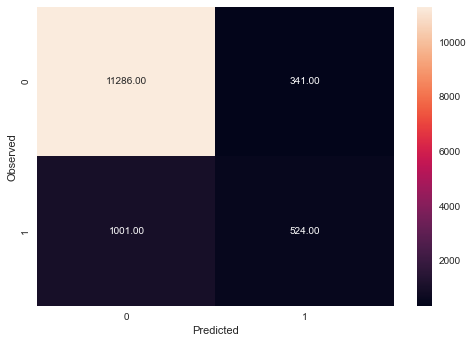

Confusion Matrix None
Recall 0.3436065573770492
Precision 0.6057803468208093
F1 Score 0.4384937238493724
ROC AUC Test 0.657139134885308
ROC AUC Train 0.9991374353076481


In [127]:
TrainAcc = rfcl.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = rfcl.score(x_test, y_test)
print("Testing accuracy",TestAcc)

cm = draw_cm(y_test,y_pred_ranfor)
print("Confusion Matrix",cm)

Recall = recall_score(y_test,y_pred_ranfor)
print("Recall",Recall)

Precision = precision_score(y_test,y_pred_ranfor)
print("Precision",Precision)
    
F1_Score = f1_score(y_test,y_pred_ranfor)
print("F1 Score",F1_Score)

AucTest = roc_auc_score(y_test,y_pred_ranfor)
print("ROC AUC Test",AucTest)

AucTrain = roc_auc_score(y_train,y_pred_ranfor_train)
print("ROC AUC Train",AucTrain)

In [128]:
result.loc[6] = ['Ensemble RanForest', TrainAcc, TestAcc, Recall, Precision,F1_Score, AucTest, AucTrain]
result

Model  TrainAcc  TestAcc  Recall  Precision  F1_Score  \
0  Logistic Regression      0.90     0.90    0.32       0.60      0.42   
1        Decision Tree      1.00     0.87    0.45       0.43      0.44   
2    Decision Tree Reg      0.90     0.90    0.36       0.60      0.45   
3         Ensemble Bag      1.00     0.90    0.41       0.57      0.48   
4         Ensemble Ada      0.90     0.89    0.36       0.57      0.44   
5        Ensemble Grad      0.91     0.90    0.36       0.63      0.45   
6   Ensemble RanForest      1.00     0.90    0.34       0.61      0.44   

   AucTest  AucTrain  
0     0.65      0.65  
1     0.69      1.00  
2     0.67      0.68  
3     0.68      1.00  
4     0.66      0.67  
5     0.66      0.68  
6     0.66      1.00

Conclusion:
Precision is really important here as it's important that the predictions that have been identified as True (i.e who will sign up for long term loan) actually do sign up.
Though almost all models are giving around 90% accuracy, the overall area under the curve & maximum precision is given by
Ensemble Gradient Boosting. Hence here Ensemble gradient boosting is the best model for this data.

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-astha1992